In [1]:
include("../mobius_jl/mobius.jl")
using .mobius
using Plots

In [2]:
# Create a model application from model and data files
app = setup_model(
    "../models/nivafjord_simplycnp_model.txt",
    "../models/example_data/NIVAFjord/nivafjord_drammen_different_layer_width.dat"
)

Overriding property "Cloud cover" with an input series.
Overriding property "Air pressure" with an input series.
Overriding property "Boundary layer O₂ saturation" with an input series.
In file ../models/example_data/NIVAFjord/nivafjord_drammen_different_layer_width.dat line 206 column 13:
The parameter group "Layer specific mixing" in the module "NIVAFjord basin" does not contain a parameter named "Mixing factor reference under ice". The version of the module in the model code is newer than the version  in the data, so this may be due to a change in the model. If you save over this data file, the parameter will be removed from the data.
In file ../models/example_data/NIVAFjord/nivafjord_drammen_different_layer_width.dat line 468 column 5:
The model "NIVAFjord-SimplyCNP" does not contain a module named "SimplyC". This data block will be ignored.



Main.mobius.Model_Data(Ptr{Nothing} @0x000001bb2222e838, true)

In [3]:
# If you want to, adjust the start and end date of the model run (or any other parameters)

start_date = get_entity(app, "start_date")
end_date   = get_entity(app, "end_date")
start_date[] = "2015-01-01"
end_date[]   = "2017-12-31"

"2017-12-31"

In [4]:
run_model(app)

true

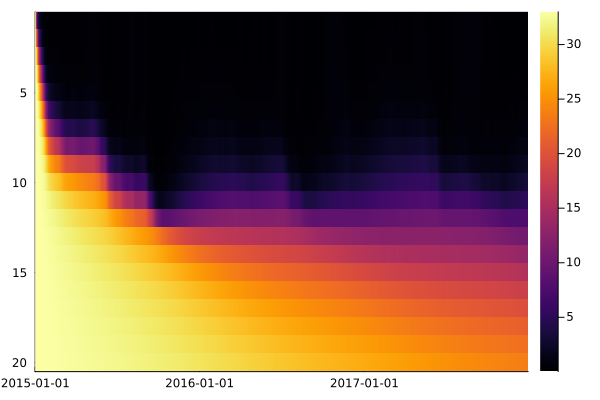

In [5]:
# Extract and plot salinity between 0 and 20 meters

salin = get_var_by_name(app, "Layer salinity")

dates = get_dates(salin)
salin_r, pos = salin["Drammensfjorden", 0:20]

heatmap(dates, pos[2:end], salin_r, yflip=true)

In [ ]:
# Extract and plot NO3 concentration between 0 and 20 meters

salin = get_var(app, ["layer", "water", "din")

dates = get_dates(salin)
salin_r, pos = salin["Drammensfjorden", 0:20]

heatmap(dates, pos[2:end], salin_r, yflip=true)